0:	learn: 0.4647189	total: 11.1ms	remaining: 11.1s
100:	learn: 0.0008087	total: 1.77s	remaining: 15.8s
200:	learn: 0.0006999	total: 3.48s	remaining: 13.8s
300:	learn: 0.0006805	total: 5.19s	remaining: 12.1s
400:	learn: 0.0006408	total: 7.25s	remaining: 10.8s
500:	learn: 0.0006181	total: 9.22s	remaining: 9.18s
600:	learn: 0.0005909	total: 11.3s	remaining: 7.5s
700:	learn: 0.0005822	total: 13.2s	remaining: 5.65s
800:	learn: 0.0005747	total: 15.1s	remaining: 3.75s
900:	learn: 0.0005580	total: 17.3s	remaining: 1.9s
999:	learn: 0.0005502	total: 19.3s	remaining: 0us
Accuracy: 1.00


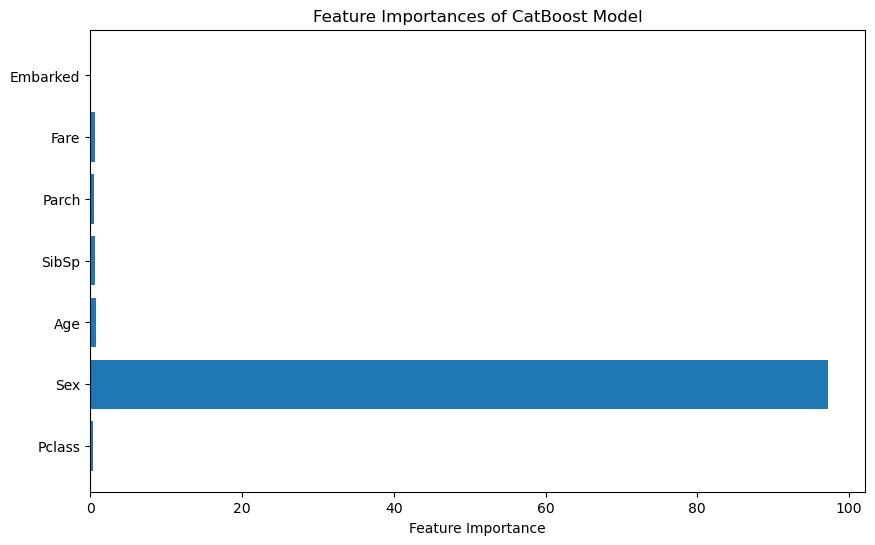

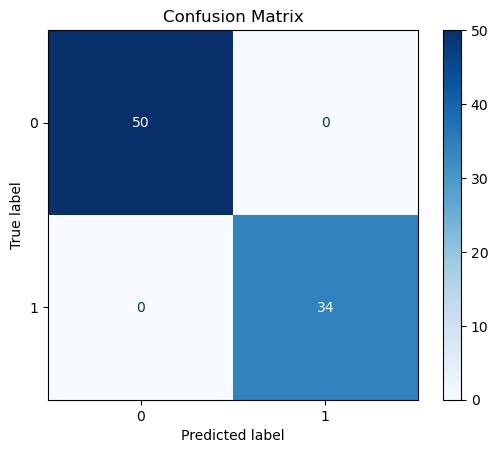

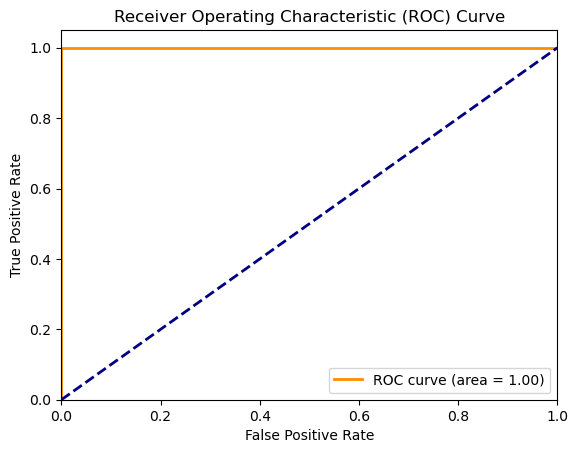

In [10]:
# Import necessary libraries
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('tested.csv')

# Data preprocessing
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Convert categorical features to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the CatBoost model
cat_features = ['Pclass', 'Sex', 'Embarked']  # Specify the categorical features
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=100)
model.fit(train_pool)

# Make predictions and evaluate the model
y_pred = model.predict(test_pool)
y_pred_proba = model.predict_proba(test_pool)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Feature importance
feature_importances = model.get_feature_importance()
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances of CatBoost Model")
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()